In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [12]:
from torchvision import datasets, transforms

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Convert the datasets to NumPy arrays
x_train = trainset.data
y_train = trainset.targets
x_test = testset.data
y_test = testset.targets

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Print the shapes
print(x_train.shape)
print(x_test.shape)

100%|████████████████████████████████████████████████████████████████| 170498071/170498071 [03:15<00:00, 874223.03it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [14]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [15]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.0343 - val_loss: 0.0291
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0259 - val_loss: 0.0246
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0233 - val_loss: 0.0231
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0226 - val_loss: 0.0222
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0218 - val_loss: 0.0218
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0217 - val_loss: 0.0218
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0217 - val_loss: 0.0219
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0217 - val_loss: 0.0217
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0217 - val_loss: 0.0217
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.021

In [17]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

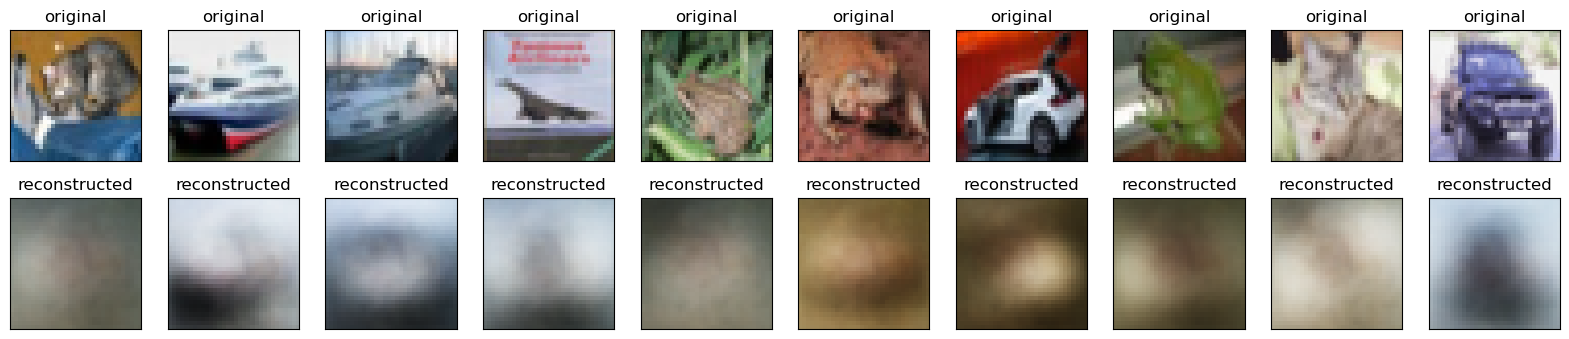

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
from torchvision import datasets, transforms

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Convert the datasets to NumPy arrays
x_train = trainset.data
y_train = trainset.targets
x_test = testset.data
y_test = testset.targets

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Print the shapes
print(x_train.shape)
print(x_test.shape)

Files already downloaded and verified
Files already downloaded and verified
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [25]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

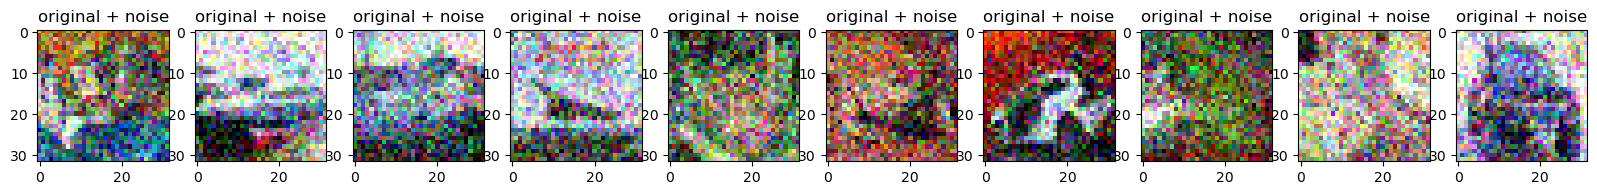

In [26]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()